## Customer Churn Prediction:
       Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.
### Content:
        Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
### The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online * security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method,
* paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
*Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)
Dataset taken from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

**1. Importing the dependencies**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline
It is a magic command used in Jupyter Notebook to display matplotlib plots inside the notebook itself.
All graphs, charts, and plots appear directly below the code cell
Output becomes static and saved with the notebook

**2. Data Loading and Understanding**

In [2]:
# load teh csv data to a pandas dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## 3.Data Understanding

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# allows pandas to display all columns of a DataFrame without truncation.
pd.set_option("display.max_columns", None)

In [6]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Checking the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [12]:
print(df["gender"].unique())

['Female' 'Male']


In [13]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
---------------------------------------

In [14]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 4. Data Cleaning and Preparation

In [15]:
telco_data= df.copy()

In [16]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
telco_data.isnull().sum() * 100 / len(telco_data['TotalCharges'])

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [19]:
telco_data.dropna(how='any', inplace = True)

In [20]:
cols=['MonthlyCharges', 'TotalCharges']
cols

['MonthlyCharges', 'TotalCharges']

In [21]:
def outlier_detect(df,col):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution of {col}")
    plt.ylabel(col)
    plt.show()
    

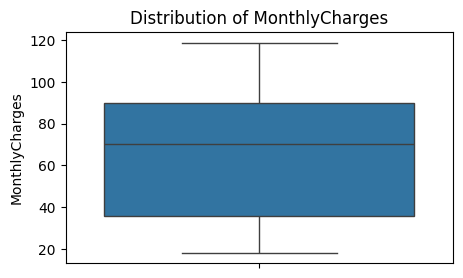

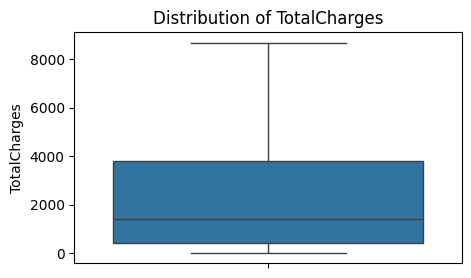

In [22]:
for i in cols:
    outlier_detect(telco_data,i)

In [23]:
mx_tenure=telco_data['tenure'].max()
mx_tenure

np.int64(72)

In [24]:
labels = ['{0}-{1}'.format(i,i+11) for i in range(1,mx_tenure,12)]
telco_data['tenure_group']= pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels = labels)

In [25]:
telco_data['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [26]:
telco_data.drop(columns=['customerID'],axis =1, inplace = True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## 5. Exploratory Data Analysis (EDA)

In [27]:
telco_data.shape

(7032, 21)

In [28]:
telco_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [29]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Numerical Features - Analysis

Understand the distribution of numerical features

In [30]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

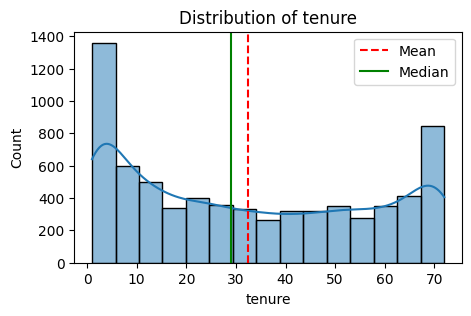

In [31]:
plot_histogram(telco_data, "tenure")

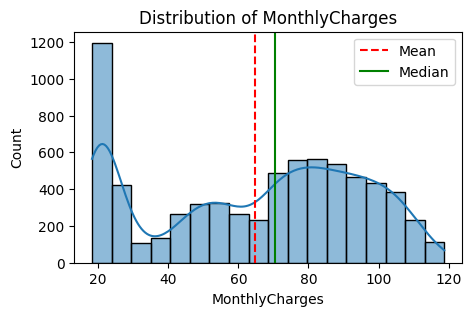

In [32]:
plot_histogram(telco_data, "MonthlyCharges")

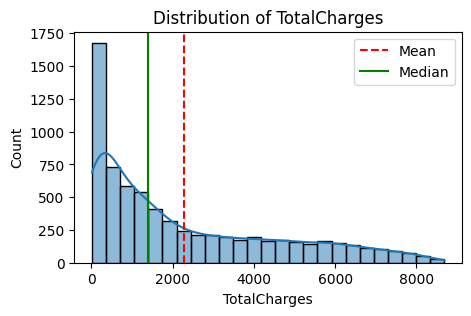

In [33]:
plot_histogram(telco_data, "TotalCharges")

**Box plot for numerical features**

In [34]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

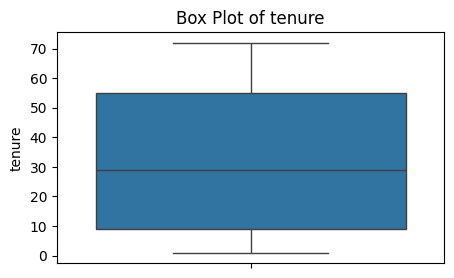

In [35]:
plot_boxplot(telco_data, "tenure")

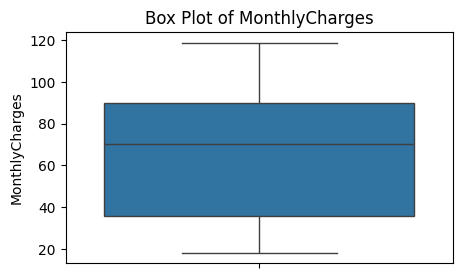

In [36]:
plot_boxplot(telco_data, "MonthlyCharges")

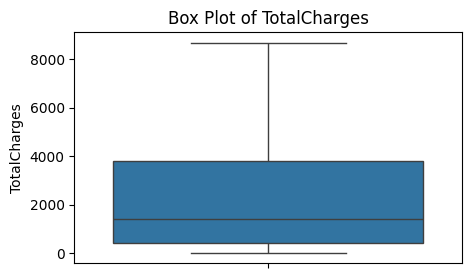

In [37]:
plot_boxplot(telco_data, "TotalCharges")

**Correlation Heatmap for numerical columns**

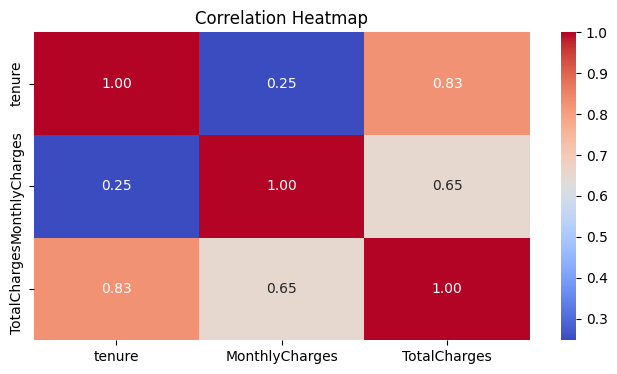

In [38]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(telco_data[["tenure", "MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [39]:
y=telco_data[telco_data['tenure']==4]['TotalCharges']

In [40]:
x=telco_data[telco_data['tenure']==4]['MonthlyCharges']

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

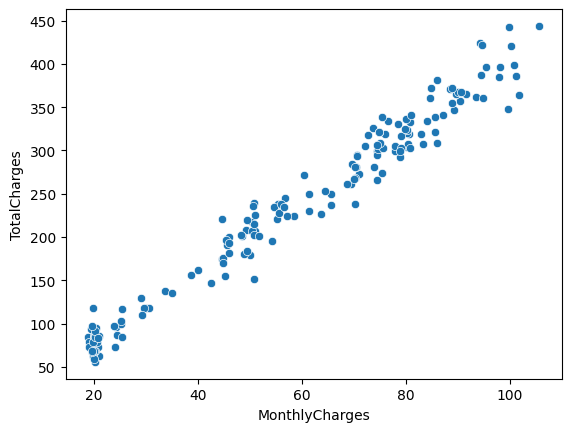

In [41]:
sns.scatterplot(y=y, x=x)

### Categorical features - Analysis

In [42]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Countplot for categorical columns

In [43]:
object_cols = telco_data.select_dtypes(include="object").columns.to_list() 
object_cols = ["SeniorCitizen"] + object_cols

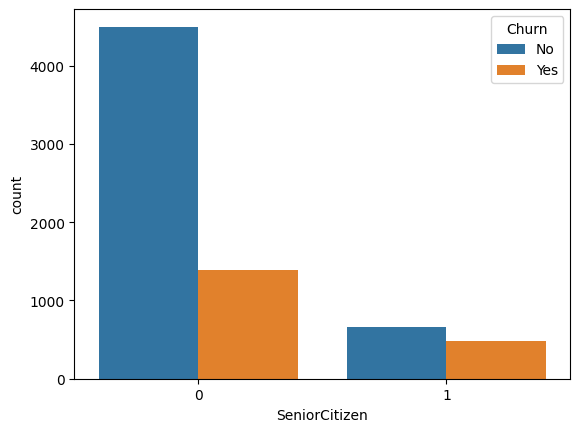

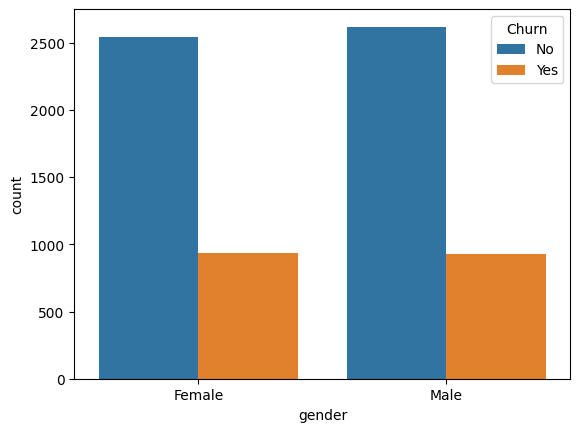

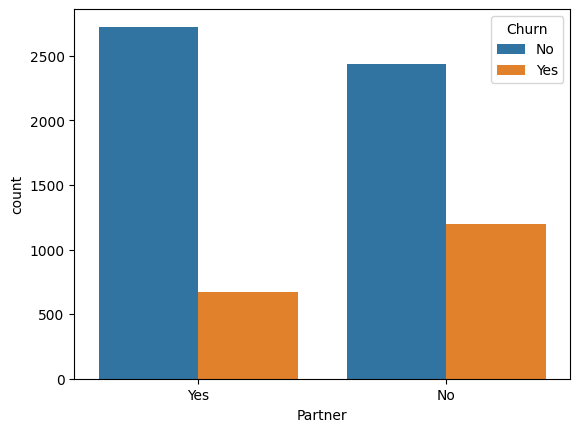

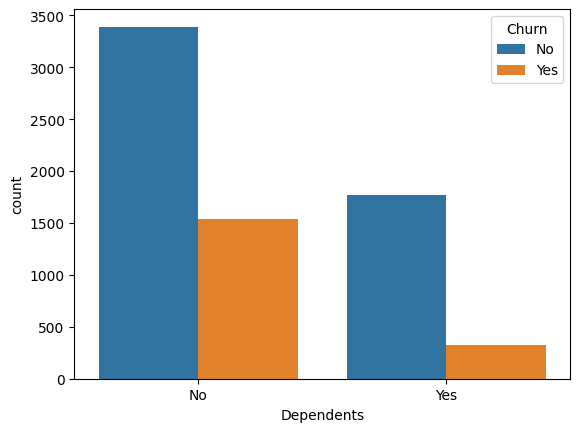

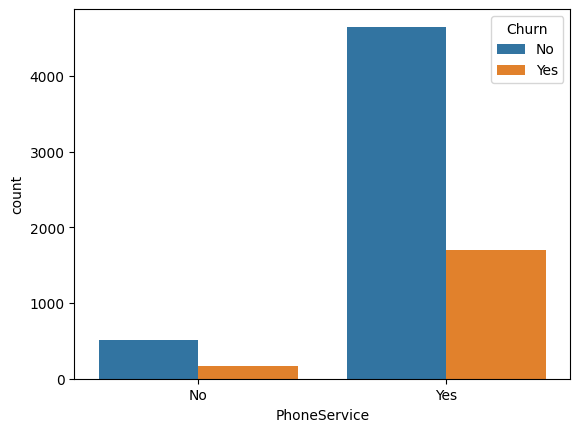

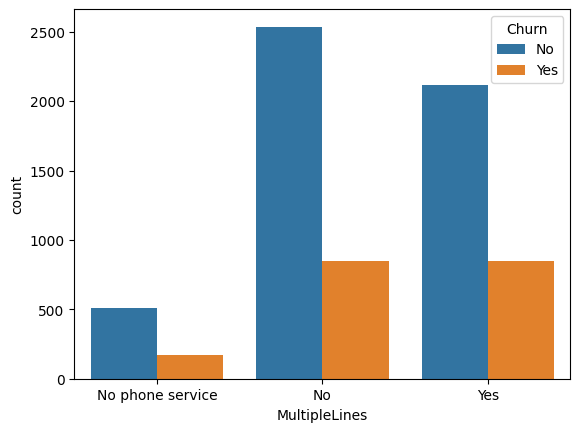

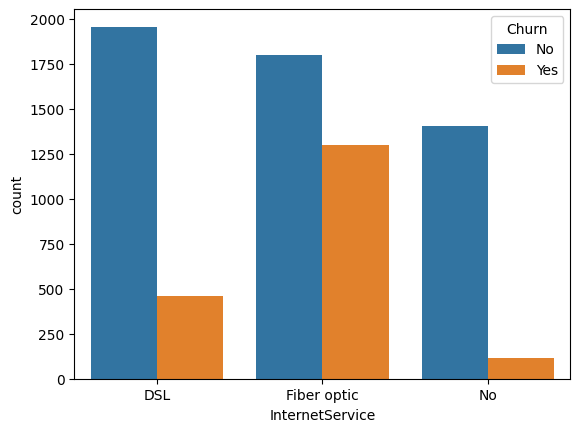

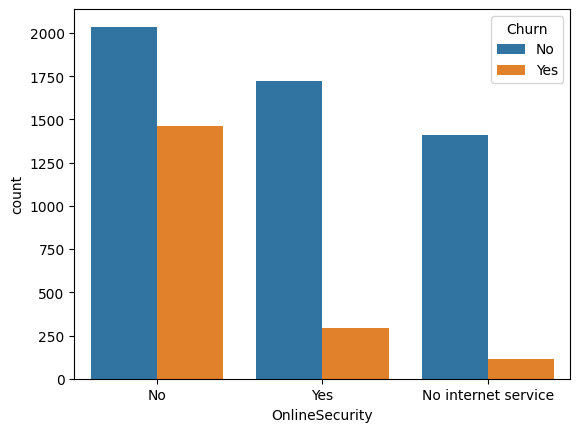

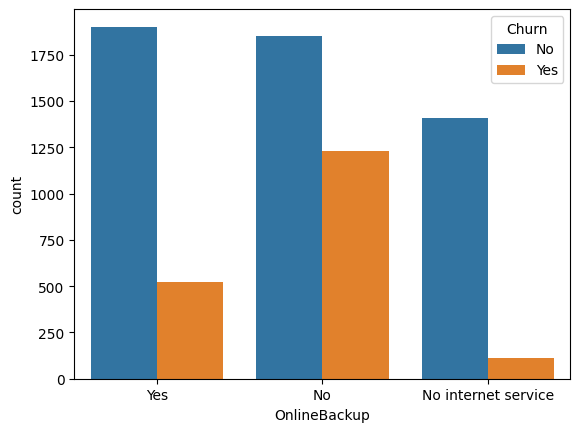

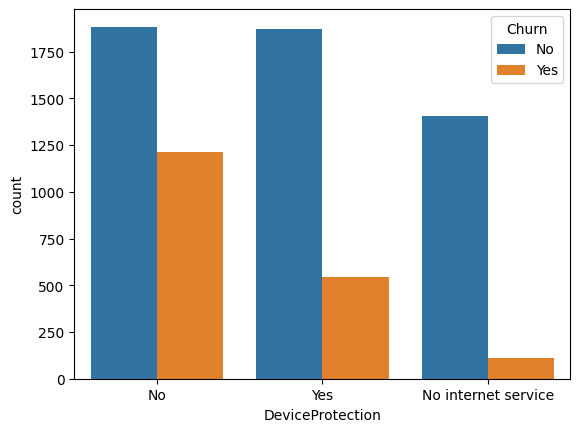

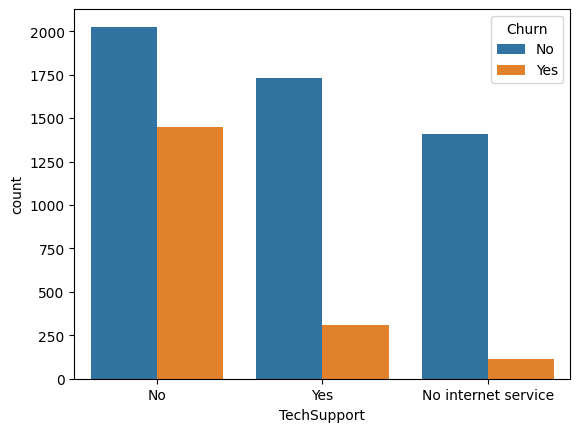

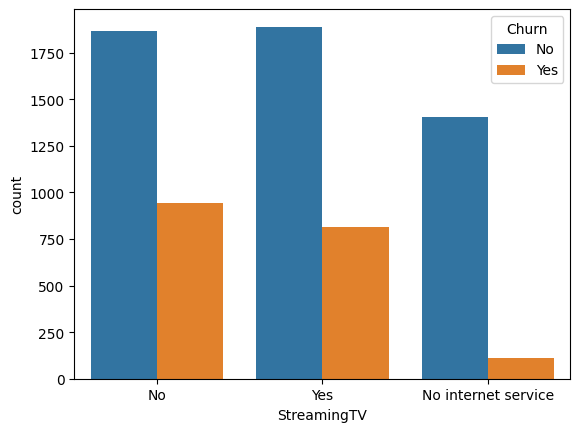

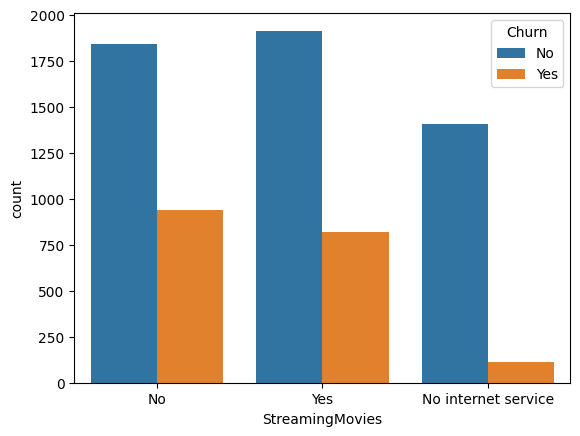

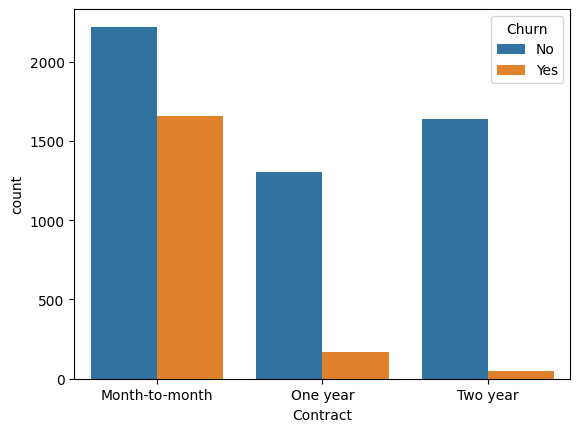

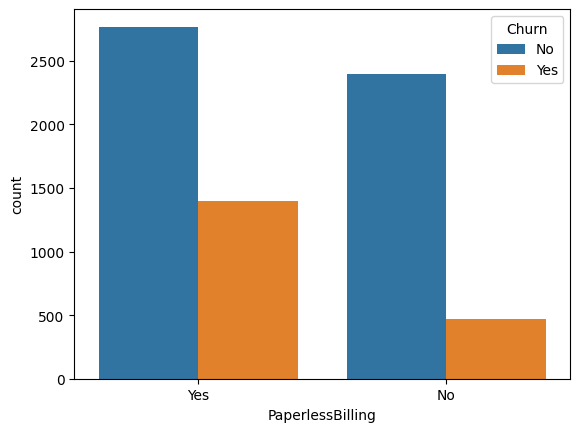

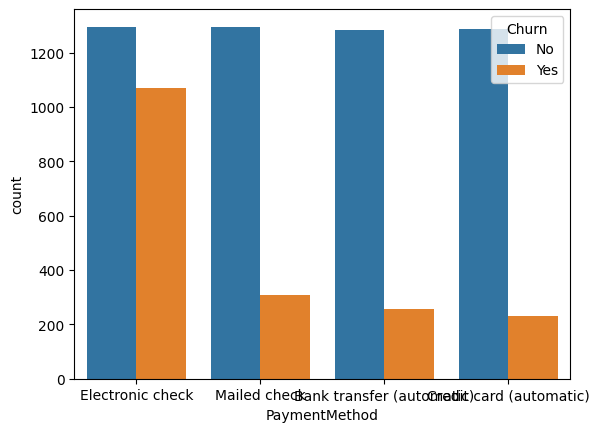

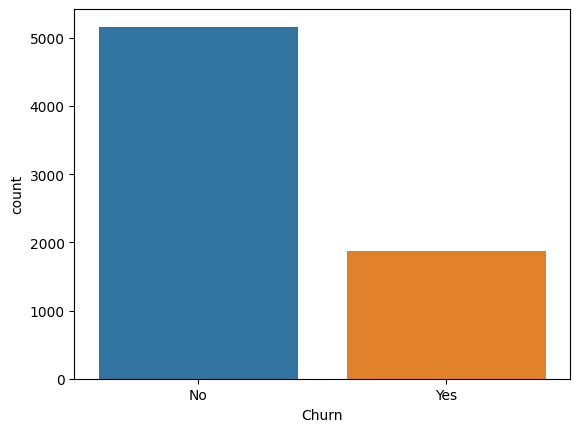

In [44]:
for i,col in enumerate(object_cols): 
    plt.figure(i) 
    sns.countplot(data = telco_data,x=col, hue ='Churn')

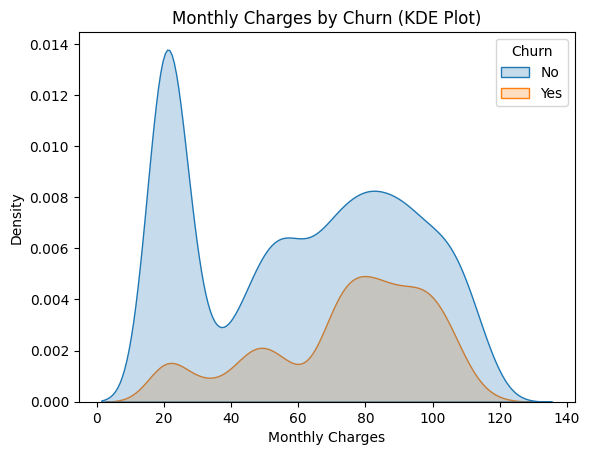

In [45]:
sns.kdeplot(
    data=telco_data,
    x="MonthlyCharges",
    hue="Churn",
    fill=True
)
plt.title("Monthly Charges by Churn (KDE Plot)")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

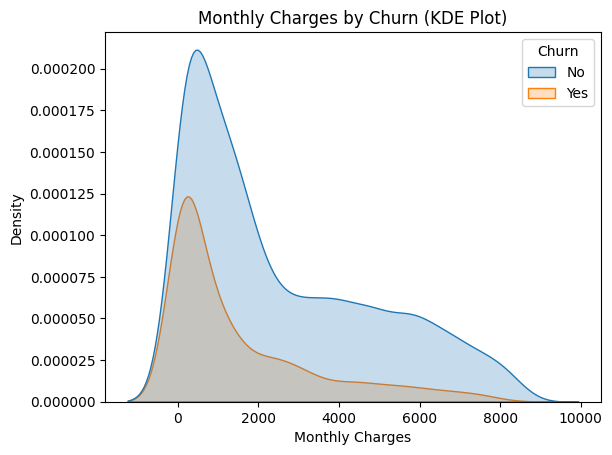

In [46]:
sns.kdeplot(
    data=telco_data,
    x="TotalCharges",
    hue="Churn",
    fill=True
)
plt.title("Monthly Charges by Churn (KDE Plot)")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

**4. Data Preprocessing**

In [47]:
telco_data=telco_data.astype({"SeniorCitizen":object,"tenure_group":object})

In [48]:
telco_data.drop(columns=["tenure"],inplace=True)

In [49]:
telco_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12


Label encoding of target column

In [50]:
telco_data["Churn"] = telco_data["Churn"].replace({"Yes": 1, "No": 0})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20552\227472267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_data["Churn"] = telco_data["Churn"].replace({"Yes": 1, "No": 0})


In [51]:
telco_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12


In [52]:
telco_data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
tenure_group         object
dtype: object

In [53]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import recall_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [54]:
X = telco_data.drop('Churn', axis=1)
y = telco_data['Churn']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [56]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

In [57]:
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group'],
      dtype='object')

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

In [59]:
# X_train_enc = preprocessor.fit_transform(X_train)
# X_test_enc = preprocessor.transform(X_test)

In [60]:
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),

    "SVM": SVC(
        kernel="rbf",
        probability=True,
        class_weight="balanced"
    ),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "GBoost": GradientBoostingClassifier(random_state=42),
    "XGBoost":XGBClassifier(eval_metric="logloss",use_label_encoder=False,random_state=42)
}

In [61]:
cv_scores = {}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    scores = cross_validate(
        pipe,
        X_train,
        y_train,
        cv=5,
        scoring=scoring
    )

    cv_scores[model_name] = scores

    print(f"Accuracy : {np.mean(scores['test_accuracy']):.2f}")
    print(f"Precision: {np.mean(scores['test_precision']):.2f}")
    print(f"Recall   : {np.mean(scores['test_recall']):.2f}")
    prTraining Logistic Regression with default parameters
Accuracy : 0.75
Precision: 0.52
Recall   : 0.79
F1 Score : 0.63
----------------------------------------------------------------------
Training SVM with default parameters
Accuracy : 0.75
Precision: 0.52
Recall   : 0.78
F1 Score : 0.63
----------------------------------------------------------------------
Training Decision Tree with default parameters
Accuracy : 0.73
Precision: 0.50
Recall   : 0.49
F1 Score : 0.49
----------------------------------------------------------------------
Training Random Forest with default parameters
Accuracy : 0.79
Precision: 0.65
Recall   : 0.49
F1 Score : 0.56
----------------------------------------------------------------------
Training GBoost with default parameters
Accuracy : 0.81
Precision: 0.67
Recall   : 0.54
F1 Score : 0.60
----------------------------------------------------------------------
Training XGBoost with default parameters
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Accuracy : 0.79
Precision: 0.62
Recall   : 0.54
F1 Score : 0.58int(f"F1 Score : {np.mean(scores['test_f1']):.2f}")
    print("-" * 70)


Training Logistic Regression with default parameters
Accuracy : 0.75
Precision: 0.52
Recall   : 0.79
F1 Score : 0.63
----------------------------------------------------------------------
Training SVM with default parameters
Accuracy : 0.75
Precision: 0.52
Recall   : 0.78
F1 Score : 0.63
----------------------------------------------------------------------
Training Decision Tree with default parameters
Accuracy : 0.73
Precision: 0.50
Recall   : 0.49
F1 Score : 0.49
----------------------------------------------------------------------
Training Random Forest with default parameters
Accuracy : 0.79
Precision: 0.65
Recall   : 0.49
F1 Score : 0.56
----------------------------------------------------------------------
Training GBoost with default parameters
Accuracy : 0.81
Precision: 0.67
Recall   : 0.54
F1 Score : 0.60
----------------------------------------------------------------------
Training XGBoost with default parameters


C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:55] WARNING: C:\a

Accuracy : 0.79
Precision: 0.62
Recall   : 0.54
F1 Score : 0.58
----------------------------------------------------------------------


C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [62]:
cv_scores

{'Logistic Regression': {'fit_time': array([0.08039284, 0.05589867, 0.0646441 , 0.06417298, 0.06038737]),
  'score_time': array([0.01911879, 0.02256942, 0.02144027, 0.02052903, 0.02136207]),
  'test_accuracy': array([0.75377778, 0.74666667, 0.72177778, 0.75111111, 0.77422222]),
  'test_precision': array([0.52455357, 0.51576577, 0.4845815 , 0.52043011, 0.54945055]),
  'test_recall': array([0.78595318, 0.76588629, 0.73578595, 0.80936455, 0.8361204 ]),
  'test_f1': array([0.6291834 , 0.61641992, 0.58432935, 0.63350785, 0.66312997])},
 'SVM': {'fit_time': array([5.31823134, 5.78440118, 5.39531493, 4.79601622, 5.68713474]),
  'score_time': array([0.30018163, 0.28661013, 0.61483002, 0.59267139, 0.6117661 ]),
  'test_accuracy': array([0.76177778, 0.752     , 0.736     , 0.75111111, 0.76711111]),
  'test_precision': array([0.53498871, 0.52232143, 0.50225225, 0.5210643 , 0.54176072]),
  'test_recall': array([0.79264214, 0.7826087 , 0.7458194 , 0.78595318, 0.80267559]),
  'test_f1': array([0.638

In [63]:
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),

    "SVM": SVC(
        kernel="rbf",
        probability=True,
        class_weight="balanced"
    ),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "GBoost": GradientBoostingClassifier(random_state=42),
    "XGBoost":XGBClassifier(eval_metric="logloss",use_label_encoder=False,random_state=42)
}

In [64]:
cv_scores = {}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("smoteenn", SMOTEENN(random_state=42)),
        ("model", model)
    ])
    scores = cross_validate(
        pipe,
        X_train,
        y_train,
        cv=5,
        scoring=scoring
    )

    cv_scores[model_name] = scores

    print(f"Accuracy : {np.mean(scores['test_accuracy']):.2f}")
    print(f"Precision: {np.mean(scores['test_precision']):.2f}")
    print(f"Recall   : {np.mean(scores['test_recall']):.2f}")
    print(f"F1 Score : {np.mean(scores['test_f1']):.2f}")
    print("-" * 70)

Training Logistic Regression with default parameters
Accuracy : 0.72
Precision: 0.48
Recall   : 0.84
F1 Score : 0.61
----------------------------------------------------------------------
Training SVM with default parameters
Accuracy : 0.73
Precision: 0.49
Recall   : 0.82
F1 Score : 0.62
----------------------------------------------------------------------
Training Decision Tree with default parameters
Accuracy : 0.72
Precision: 0.48
Recall   : 0.78
F1 Score : 0.60
----------------------------------------------------------------------
Training Random Forest with default parameters
Accuracy : 0.74
Precision: 0.51
Recall   : 0.82
F1 Score : 0.63
----------------------------------------------------------------------
Training GBoost with default parameters
Accuracy : 0.73
Precision: 0.49
Recall   : 0.84
F1 Score : 0.62
----------------------------------------------------------------------
Training XGBoost with default parameters


C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:49:33] WARNING: C:\a

Accuracy : 0.74
Precision: 0.50
Recall   : 0.80
F1 Score : 0.62
----------------------------------------------------------------------


In [65]:
final_rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("smoteenn", SMOTEENN(random_state=42)),
    ("model", RandomForestClassifier(random_state=42))
])

In [66]:
final_rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('smoteenn', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
y_test_pred = final_rf_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[708 325]
 [ 69 305]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.48      0.82      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.74      1407



**7.saved  model**

In [68]:
import joblib

joblib.dump(final_rf_pipeline, "churn_random_forest_pipeline.pkl")


['churn_random_forest_pipeline.pkl']